In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
from functions import *

interactive(children=(FloatSlider(value=5.0, description='eps', max=10.0, step=0.01), FloatSlider(value=2.0, d…

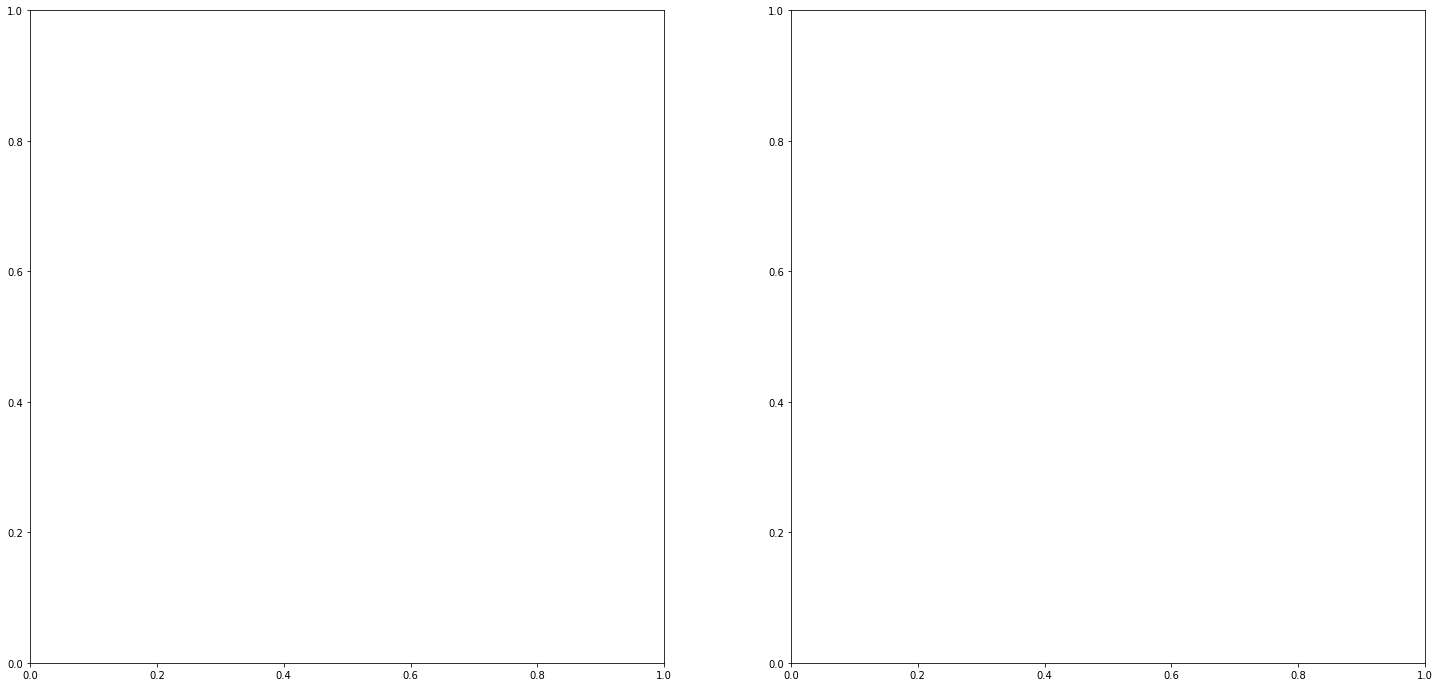

In [11]:
def graphics(eps, s, c):
    fig, axs = plt.subplots(1, 2, figsize=(25, 12))
    
    xs = np.linspace(0, np.log(1 + eps) - 0.01, num=100)
    
    exp2 = exponential_expection(eps=eps, shift=s)
    gauss = sub_gaussian(const=c)

    x0 = np.log(s / (s + 1) * (1 + eps))

    x_inter = find_intersection(exp2, gauss, (x0, np.log(1 + eps) - 0.01))

    axs[0].set_title(r'X $\sim Geom(1 + eps) - s$',size=16)
    
    axs[0].plot(xs, exp2(xs), color='red', label=r'$E[exp(\gamma X)]$')

    axs[0].plot(xs, gauss(xs), color='green', label=r'$exp(\frac{c}{2} \gamma^2)$')
    axs[0].plot(xs, [1] * len(xs), color='blue')

    if (0 <= x_inter):
        axs[0].plot(x_inter, gauss(x_inter), 'o', color='grey')
    
    axs[0].plot(x0, exp2(x0), 'o', color='grey')
    axs[0].set_ylim([0, 4])
    axs[0].set_xlabel(r'$\gamma$',size=15)
    axs[0].legend(fontsize=15)

    axs[1].set_title(r'Negative drift and sub-gaussian probabilities',size=16)
    
    d_end = 15

    ds = np.linspace(0, d_end, num=500)

    neg_pr = negative_drift_probability(eps=eps, shift=s)
    axs[1].plot(ds, [neg_pr(d) for d in ds], label=r'$\Pr_{Neg}[T \leq \frac{d}{s}]$')

    sub_pr = sub_gaussian_probability(eps=eps, shift=s)
    # print([sub_pr(d, c) for d in ds])
    axs[1].plot(ds, [sub_pr(d, c) for d in ds], color='orange', label=r'$\Pr_{Gaus}[T \leq \frac{d}{s}]$')

    axs[1].set_ylim([0, 0.7])
    axs[1].set_xlim([0, d_end])
    axs[1].set_xlabel(r'$d$ - distance',size=15)
    axs[1].legend(fontsize=15)

    plt.show()

interactive_plot = interactive(graphics, eps=(0, 10.0, 0.01), s=(0, 5, 0.01), c=(0, 2, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '720px'
interactive_plot